In [1]:
import itk
#from ngff_zarr import ngff_image_to_itk_image, to_ngff_zarr, itk_image_to_ngff_image
from itkwidgets import view

In [2]:
import h5py
import SimpleITK as sitk
import numpy as np


def LoadH5APS(filename):
    with h5py.File(filename, 'r') as hdf5_file:
        dataset = hdf5_file['/exchange/data']
        numpy_array = np.array(dataset)
        return itk.GetImageFromArray(np.ascontiguousarray(numpy_array))


In [3]:
#image = itk.imread(file_name)


image = LoadH5APS('/local/data/alberto/TXM/Mn-1P/Mn_P_1C_742.h5')


#imageC = itk.GetArrayFromImage(image)


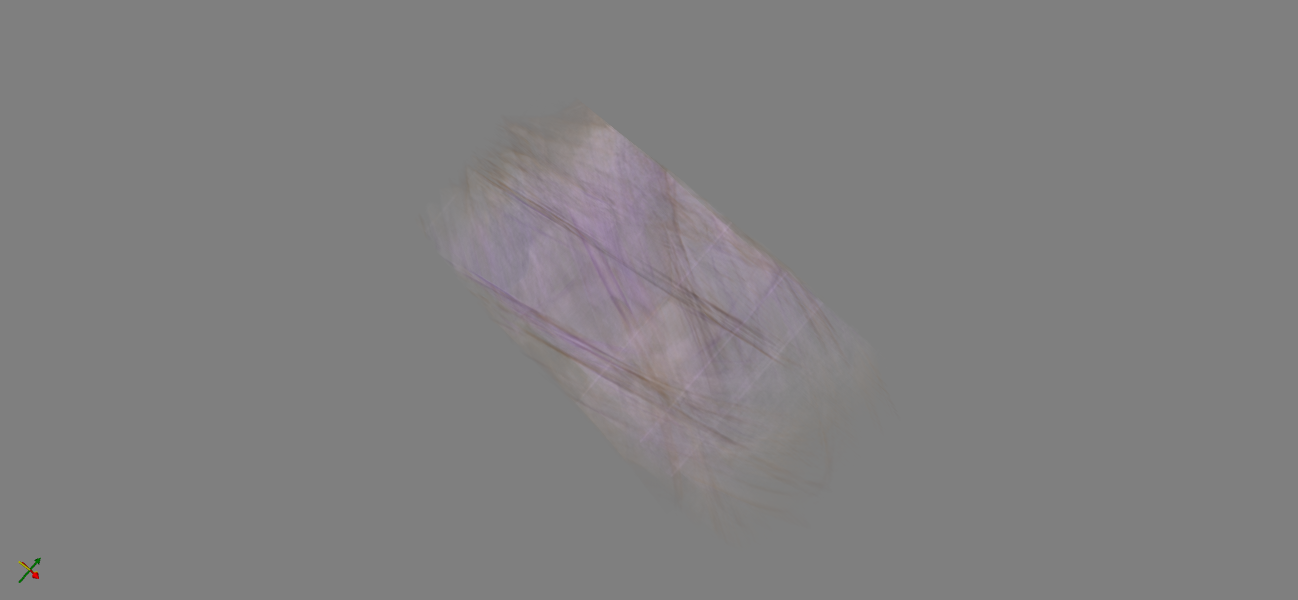
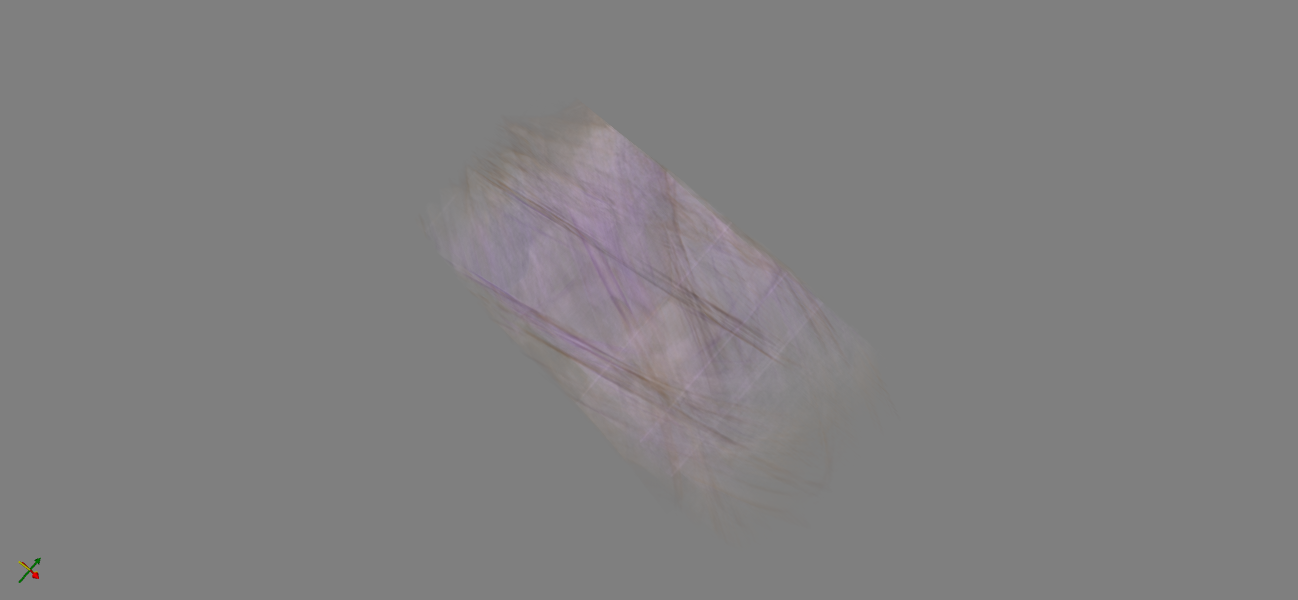

<IPython.core.display.Javascript object>

In [4]:
viewer = view(image)

In [ ]:
# Find the scale that we currently have loaded
loaded_scale = viewer.get_current_scale()

In [ ]:
loaded_scale

In [ ]:
# Request the slice information for the ROI
default_roi_slices = viewer.get_roi_slice()
roi_slices = viewer.get_roi_slice(loaded_scale)

In [ ]:
# The results should match
print(f'Slices for loaded scale:       {roi_slices}')
print(f'Slices with default parameter: {default_roi_slices}')

In [ ]:
# Get the selected region for the current level
roi_region = viewer.get_roi_region()

In [ ]:
print(roi_region)

In [ ]:
# get_roi_image will return an ngff image for the currently selected image
# optionally a name can also be passed in to select a specific image if more than one image or label is loaded
roi_image = viewer.get_roi_image(loaded_scale)

In [ ]:
print(roi_image)

In [ ]:
# Optionally we can also grab the ngff images for all scales
roi_multiscales = viewer.get_roi_multiscale()

In [ ]:
print(roi_multiscales)

In [ ]:
# Create a new viewer using only the data in the ROI determined above
viewer2 = view(roi_multiscales, rotate=True)

In [ ]:
from ngff_zarr import ngff_image_to_itk_image, to_ngff_zarr, itk_image_to_ngff_image


In [ ]:
# Save the roi multiscales to an OME-Zarr
to_ngff_zarr('roi.zarr', multiscales=roi_multiscales)

In [ ]:
# Get the correpsonding itk.Image
roi_image = ngff_image_to_itk_image(roi_image, wasm=False)

In [ ]:
# Run filtering, save to other formats, ...
itk.imwrite(roi_image, 'roi_image.nrrd')

roi_gradient = itk.gradient_magnitude_image_filter(roi_image)
itk.imwrite(roi_gradient, 'roi_gradient.nrrd')

In [ ]:
start_index = image.TransformPhysicalPointToIndex([roi_region[0]['x'], roi_region[0]['y'], roi_region[0]['z']])
size = image.TransformPhysicalPointToIndex([roi_region[1]['x'], roi_region[1]['y'], roi_region[1]['z']]) - start_index
extraction_region = itk.ImageRegion[3](start_index, size)

roi_image = itk.extract_image_filter(image, extraction_region=extraction_region)

viewer3 = view(roi_image, rotate=True)